In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [7]:
music = pd.read_excel('Music.xlsx')

In [ ]:
music.head()
music.info()
music.shape
music.describe()

In [13]:
#Statistical Models
average = round(np.mean(music['Play Duration Minutes']))
print(average)
median = round(np.median(music['Play Duration Minutes']))
print(median)
stddev = round(np.std(music['Play Duration Minutes']))
print(stddev)
var = round(np.var(music['Play Duration Minutes']))
print(var)

3
2
6
33


In [15]:
#Probability Models
# Odds of Listenging to less than 5000 minutes monthly
prob_list = round(stats.norm.cdf(5000, loc = 4431.102, scale = 1101.64),2)
print(prob_list)
# Odds of Listening to 5000 
prob_list_rev = round(1 - stats.norm.cdf(5000, loc = 4431.102, scale = 1101.64),2)
print(prob_list_rev)

0.7
0.3


In [ ]:
# Identifying the top 10 most streamed songs
top_songs = (music[['Song Name','Artist','Play Duration Minutes']].sort_values('Play Duration Minutes', ascending = False))
print(top_songs.head(10))

In [ ]:
#Identifying the months with the most minutes and the year it occurred in order
ranked_months = music.groupby(['Year', 'Month'])['Play Duration Minutes'].sum().reset_index()
print(ranked_months.sort_values('Play Duration Minutes', ascending = False))

In [ ]:
#identifying the top 5 songs from each year ordered from most minutes to least
ranked_songs = music.groupby(['Year', 'Artist','Song Name'])['Play Duration Minutes'].sum().reset_index()
ranked_songs['Rank'] = ranked_songs.groupby('Year')['Play Duration Minutes'].rank(ascending = False)
top_ranked_songs = ranked_songs[ranked_songs['Rank'] <= 5]
order_ranked = top_ranked_songs.sort_values(by = ['Year','Rank'])
print(order_ranked)

In [12]:
correlation = music['Play Duration Minutes'].corr(music['Year'])
print(correlation)

0.027461975106659153


<Axes: xlabel='Year', ylabel='Play Duration Minutes'>

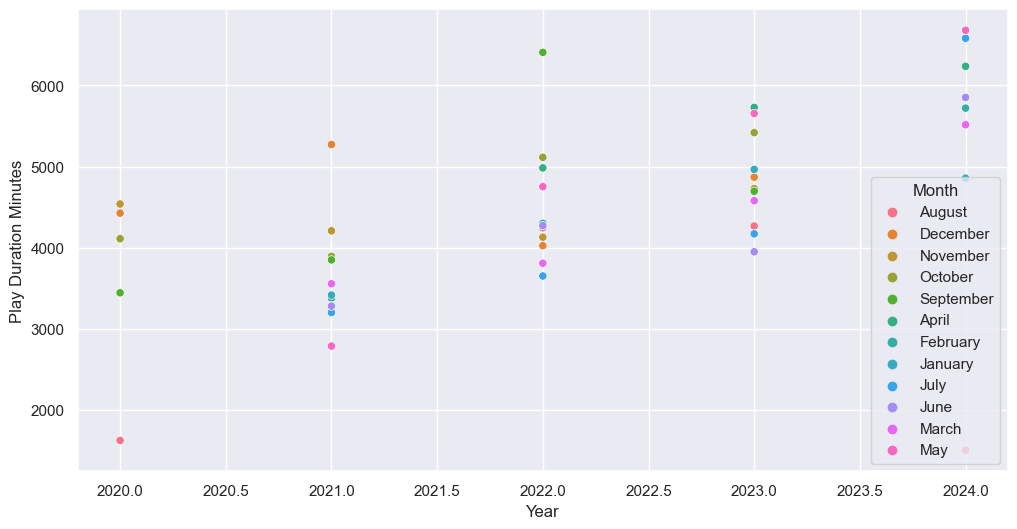

In [97]:
#Quick Visualizations 
sns.scatterplot(x = 'Year', y = 'Play Duration Minutes', data = ranked_months, hue ='Month')

<Axes: xlabel='Year', ylabel='Play Duration Minutes'>

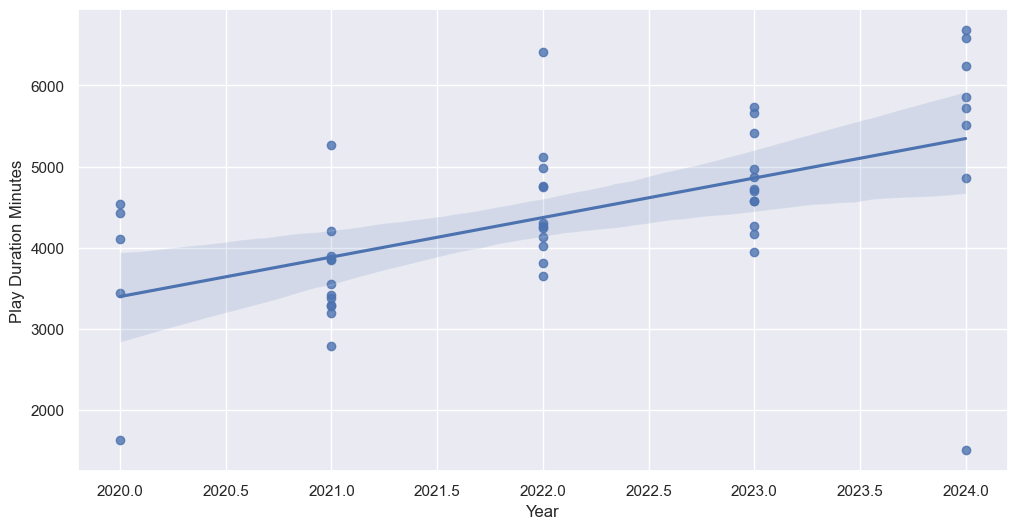

In [87]:
sns.regplot(x = 'Year', y = 'Play Duration Minutes', data = ranked_months, hue ='Month')

<Axes: xlabel='Year', ylabel='Play Duration Minutes'>

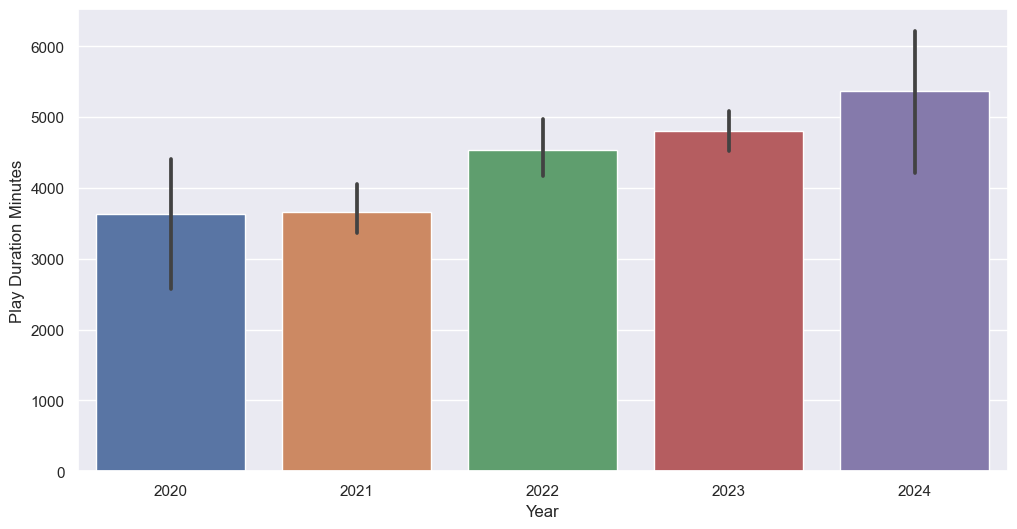

In [85]:
sns.barplot(x = 'Year', y = 'Play Duration Minutes', data = ranked_months)